In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn.datasets import load_diabetes

%matplotlib inline

In [2]:
X, y = load_diabetes(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)

In [4]:
def gb_predict(X, trees_list, coef_list, eta):
    """Gradient boosting predict."""
    
    return np.array([sum([eta * coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

In [5]:
def mean_squared_error(y_real, prediction):
    """Mean squared error evaluation."""
    
    return (sum((y_real - prediction) ** 2)) / len(y_real)

In [6]:
def bias(y, z):
    """L2 loss derivative."""
    
    return (y - z)

In [7]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    """Gradient boosing fit."""
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        if len(trees) == 0:
            tree.fit(X_train, y_train)
        else:
            y_pred = gb_predict(X_train, trees, coefs, eta)
            target = bias(y_train, y_pred)
            
            tree.fit(X_train, target)
            
        train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
        test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
        trees.append(tree)
        
    return trees, train_errors, test_errors

In [8]:
def evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta):
    """Evaluate algorithm error."""
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    
    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
    
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    
    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

In [9]:
def get_error_plot(n_tress, train_err, test_err):
    """Get error plot."""
    
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')
    plt.xlim(0, n_trees)
    plt.plot(list(range(n_trees)), train_err, label='train error')
    plt.plot(list(range(n_trees)), test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

### Задание 1: Для реализованной в методичке модели градиентного бустинга построить графики зависимости ошибки от количества деревьев в ансамбле и от максимальной глубины деревьев. Сделать выводы о зависимости ошибки от этих параметров.

In [10]:
n_trees = 20

coefs = [1] * n_trees

max_depth = 3

eta = 1

In [11]:
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

In [12]:
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)

Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тренировочной выборке: 662.113345029343
Ошибка алгоритма из 20 деревьев глубиной 3     с шагом 1 на тестовой выборке: 6104.130642664156


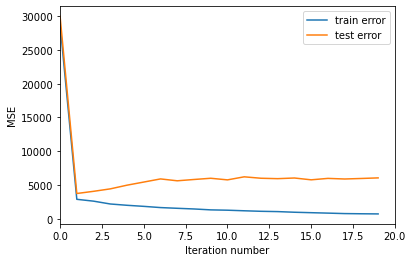

In [13]:
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 20 деревьев глубиной 4     с шагом 1 на тренировочной выборке: 82.61421267770005
Ошибка алгоритма из 20 деревьев глубиной 4     с шагом 1 на тестовой выборке: 6042.13933679927


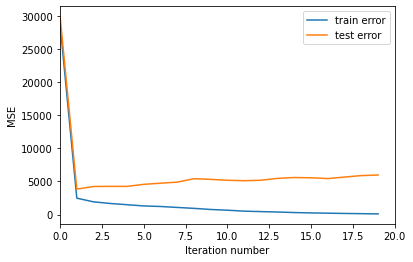

In [14]:
max_depth = 4
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 1 на тренировочной выборке: 5.220404856841931
Ошибка алгоритма из 20 деревьев глубиной 5     с шагом 1 на тестовой выборке: 6321.43774362934


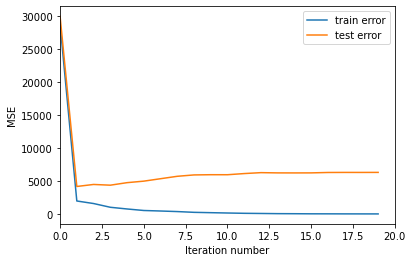

In [15]:
max_depth = 5
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 20 деревьев глубиной 6     с шагом 1 на тренировочной выборке: 0.15955453645057668
Ошибка алгоритма из 20 деревьев глубиной 6     с шагом 1 на тестовой выборке: 5930.396680225914


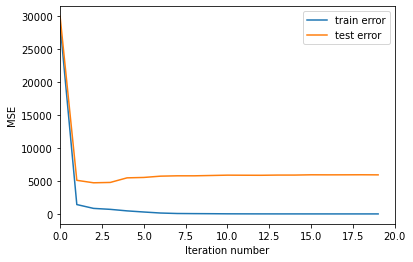

In [16]:
max_depth = 6
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

Ошибка алгоритма из 20 деревьев глубиной 8     с шагом 1 на тренировочной выборке: 8.766649080284877e-08
Ошибка алгоритма из 20 деревьев глубиной 8     с шагом 1 на тестовой выборке: 7181.728473358198


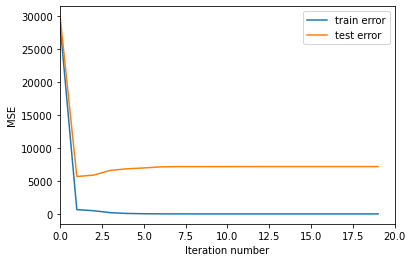

In [17]:
max_depth = 8
trees, train_errors, test_errors = gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
evaluate_alg(X_train, X_test, y_train, y_test, trees, coefs, eta)
get_error_plot(n_trees, train_errors, test_errors)

### Задание 2: (опция). Модифицировать реализованный алгоритм, чтобы получился стохастический градиентный бустинг. Размер подвыборки принять равным 0.5. Сравнить на одном графике кривые изменения ошибки на тестовой выборке в зависимости от числа итераций.

In [ ]:
def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    """Gradient boosing fit."""
    
    trees = []
    
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        
        if len(trees) == 0:
            tree.fit(X_train, y_train)
        else:
            y_pred = gb_predict(X_train, trees, coefs, eta)
            target = bias(y_train, y_pred)
            
            tree.fit(X_train, target)
            
        train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
        test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        
        trees.append(tree)
        
    return trees, train_errors, test_errors